## Lab 6. Análisis de tráfico de red

### Miembros
* Fernanda Esquivel - 21542

### Link al repositorio
El repositorio puede ser visualizado [acá](https://github.com/FerEsq/SDS-Lab-06)

In [1]:
from scapy.all import rdpcap, IP, TCP, UDP
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Análisis estadístico

## Preprocesamiento de 'analisis_paquetes.pcap'

In [2]:
packages = rdpcap("analisis_paquetes.pcap")
print(f"   Se han cargado {len(packages)} paquetes del archivo PCAP\n")

   Se han cargado 62 paquetes del archivo PCAP



In [3]:
data = []

In [4]:
for pkt in packages:
    # Diccionario para almacenar la información del paquete actual
    pkt_info = {}
    
    # Verificamos si el paquete tiene una capa IP
    if IP in pkt:
        pkt_info['Src_Address'] = pkt[IP].src
        pkt_info['Dst_Address'] = pkt[IP].dst
        pkt_info['Protocol'] = pkt[IP].proto
        pkt_info['IP_Length'] = pkt[IP].len
        pkt_info['TTL'] = pkt[IP].ttl
        
        # Verificamos si el paquete tiene una capa TCP
        if TCP in pkt:
            pkt_info['Src_Port'] = pkt[TCP].sport
            pkt_info['Dst_Port'] = pkt[TCP].dport
            pkt_info['TCP_Flags'] = pkt[TCP].flags
            pkt_info['Seq_Num'] = pkt[TCP].seq
            pkt_info['Ack'] = pkt[TCP].ack
        # Verificamos si el paquete tiene una capa UDP
        elif UDP in pkt:
            pkt_info['Src_Port'] = pkt[UDP].sport
            pkt_info['Dst_Port'] = pkt[UDP].dport
        else:
            pkt_info['Src_Port'] = None
            pkt_info['Dst_Port'] = None
        
        # Agregamos la información del paquete a nuestra lista
        data.append(pkt_info)

In [5]:
#Creción del DataFrame con la info recopilada
df = pd.DataFrame(data)
print("DataFrame creado con éxito\n")

DataFrame creado con éxito



In [6]:
print("Contenido de las primeras 5 filas del dataset:")
print(df.head(5))
print("\n")

Contenido de las primeras 5 filas del dataset:
   Src_Address  Dst_Address  Protocol  IP_Length  TTL  Src_Port  Dst_Port
0   10.1.10.53  84.54.22.33        17        961   64        53        53
1  84.54.22.33   10.1.10.53        17         84  122        53        53
2   10.1.10.53  84.54.22.33        17        975   64        53        53
3  84.54.22.33   10.1.10.53        17         84  122        53        53
4   10.1.10.53  84.54.22.33        17       1012   64        53        53




In [7]:
print("Valores de las columnas principales:")
colsToShow = ['Src_Address', 'Dst_Address', 'Src_Port', 'Dst_Port']
print(df[colsToShow].head(10))  # Mostramos las primeras 10 filas
print("\n")

Valores de las columnas principales:
   Src_Address  Dst_Address  Src_Port  Dst_Port
0   10.1.10.53  84.54.22.33        53        53
1  84.54.22.33   10.1.10.53        53        53
2   10.1.10.53  84.54.22.33        53        53
3  84.54.22.33   10.1.10.53        53        53
4   10.1.10.53  84.54.22.33        53        53
5  84.54.22.33   10.1.10.53        53        53
6   10.1.10.53  84.54.22.33        53        53
7  84.54.22.33   10.1.10.53        53        53
8   10.1.10.53  84.54.22.33        53        53
9  84.54.22.33   10.1.10.53        53        53




## Estadísticas

### Todas las IP origen

In [18]:
#Mostrar todas las IP origen
print("   IPs origen únicas:")
ipsOrigin = df['Src_Address'].unique()
print(ipsOrigin)
print(f"      Total de IPs origen únicas: {len(ipsOrigin)}")
print("\n")

   IPs origen únicas:
['10.1.10.53' '84.54.22.33' '75.75.75.75']
      Total de IPs origen únicas: 3




### Todas las IP destino

In [9]:
#Mostrar todas las IP destino
print("   IPs destino únicas:")
ipsDestination = df['Dst_Address'].unique()
print(ipsDestination)
print(f"      Total de IPs destino únicas: {len(ipsDestination)}")
print("\n")

   IPs destino únicas:
['84.54.22.33' '10.1.10.53' '75.75.75.75']
      Total de IPs destino únicas: 3




### ¿Cuál es la IP origen más frecuente?

In [ ]:
#IP origen más frecuente
print("   IP origen más frecuente:")
ipOrFrequent = df['Src_Address'].value_counts().idxmax()
ipOrCount = df['Src_Address'].value_counts().max()
print(f"      IP: {ipOrFrequent} (aparece {ipOrCount} veces)")

   IP origen más frecuente:
      IP: 10.1.10.53 (aparece 31 veces)


#### ¿A qué IP destino se comunica con más frecuencia?

In [ ]:
print("      IP destino con la que se comunica más frecuentemente:")
# Filtramos el DataFrame para la IP origen más frecuente
dfIPFrequent = df[df['Src_Address'] == ipOrFrequent]
ipDestFrequent = dfIPFrequent['Dst_Address'].value_counts().idxmax()
ipDestCount = dfIPFrequent['Dst_Address'].value_counts().max()
print(f"         IP: {ipDestFrequent} (aparece {ipDestCount} veces)")

      IP destino con la que se comunica más frecuentemente:
         IP: 84.54.22.33 (aparece 29 veces)


#### ¿A qué puerto destino se comunica?

In [ ]:
print("      Puertos destino a los que se comunica:")
#Filtramos para la IP origen más frecuente y la IP destino más frecuente
dfIPPort = df[(df['Src_Address'] == ipOrFrequent) & (df['Dst_Address'] == ipDestFrequent)]
destinationPorts = dfIPPort['Dst_Port'].value_counts()
print(destinationPorts.head(10))  # Mostramos los 10 puertos más frecuentes

      Puertos destino a los que se comunica:
Dst_Port
53    29
Name: count, dtype: int64


##### ¿Cuál es el propósito de este puerto?

In [ ]:
#Identificamos el puerto más común
commonPort = destinationPorts.idxmax()
print(f"\n      Puerto destino más común: {commonPort}")


      Puerto destino más común: 53


In [15]:
#Diccionario con puertos comunes y sus propósitos
knownPorts = {
    20: "FTP (transferencia de datos)",
    21: "FTP (control)",
    22: "SSH (acceso remoto seguro)",
    23: "Telnet (acceso remoto)",
    25: "SMTP (correo saliente)",
    53: "DNS (resolución de nombres)",
    80: "HTTP (web)",
    110: "POP3 (correo entrante)",
    143: "IMAP (correo entrante)",
    443: "HTTPS (web segura)",
    3389: "RDP (escritorio remoto)",
    8080: "HTTP Alternativo/Proxy"
}

In [16]:
# Verificamos si el puerto está en nuestro diccionario
if commonPort in knownPorts:
    print(f"      Propósito: {knownPorts[commonPort]}")
else:
    #Si no está en nuestro diccionario, comprobamos algunos rangos comunes
    if 0 <= commonPort <= 1023:
        print("      Propósito: Puerto bien conocido (sistema)")
    elif 1024 <= commonPort <= 49151:
        print("      Propósito: Puerto registrado (aplicaciones)")
    else:
        print("      Propósito: Puerto dinámico/privado (uso temporal)")

      Propósito: DNS (resolución de nombres)


#### ¿Desde que puertos origen se comunica?

In [ ]:
print("      Puertos origen desde los que se comunica:")
originPorts = dfIPPort['Src_Port'].value_counts()
print(originPorts.head(10))  #Mostramos los 10 puertos origen más frecuentes

      Puertos origen desde los que se comunica:
Src_Port
53    29
Name: count, dtype: int64


## Gráficas

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json
from scapy.all import rdpcap, IP, TCP, UDP
import numpy as np

In [21]:
for pkt in packages:
    # Diccionario para almacenar información del paquete actual
    pkt_info = {}
    
    # Verificar si el paquete tiene una capa IP
    if IP in pkt:
        pkt_info['Src_Address'] = pkt[IP].src
        pkt_info['Dst_Address'] = pkt[IP].dst
        pkt_info['Protocol'] = pkt[IP].proto
        pkt_info['IP_Length'] = pkt[IP].len  # Longitud total del paquete IP
        pkt_info['Payload'] = len(pkt[IP].payload)  # Tamaño del payload
        pkt_info['TTL'] = pkt[IP].ttl
        pkt_info['Timestamp'] = pkt.time  # Tiempo de captura
        
        # Verificar si el paquete tiene una capa TCP
        if TCP in pkt:
            pkt_info['Src_Port'] = pkt[TCP].sport
            pkt_info['Dst_Port'] = pkt[TCP].dport
            pkt_info['TCP_Flags'] = pkt[TCP].flags
            pkt_info['Seq_Num'] = pkt[TCP].seq
            pkt_info['Ack'] = pkt[TCP].ack
        # Verificar si el paquete tiene una capa UDP
        elif UDP in pkt:
            pkt_info['Src_Port'] = pkt[UDP].sport
            pkt_info['Dst_Port'] = pkt[UDP].dport
        else:
            pkt_info['Src_Port'] = None
            pkt_info['Dst_Port'] = None
        
        # Agregar la información del paquete a nuestra lista
        data.append(pkt_info)

In [22]:
#Crear DataFrame con la información recopilada
df = pd.DataFrame(data)
print(f"DataFrame creado con {len(df)} filas y {len(df.columns)} columnas\n")

DataFrame creado con 124 filas y 9 columnas



In [24]:
#Convertir el timestamp a formato datetime para facilitar análisis temporal
# Convertir primero a float para manejar valores EDecimal de Scapy
df['Timestamp_float'] = df['Timestamp'].astype(float)
df['Datetime'] = pd.to_datetime(df['Timestamp_float'], unit='s')

### IPs origen vs. suma de los payloads

In [38]:
# Agrupar por IP origen y sumar los payloads
ip_origen_payload = df.groupby('Src_Address')['Payload'].sum().sort_values(ascending=False)
# Tomar las 15 IPs con mayor volumen para mejor visualización
top_ips_origen = ip_origen_payload.head(15)

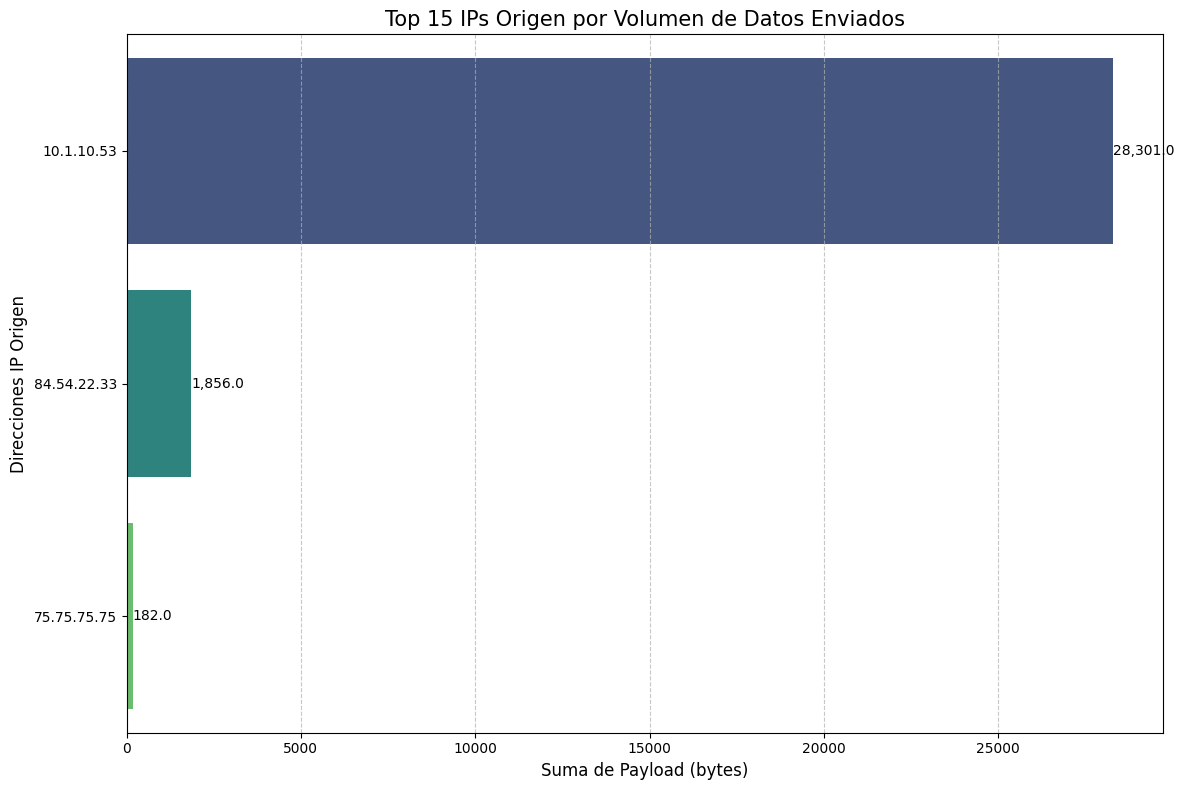

In [39]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_ips_origen.values, y=top_ips_origen.index, orient='h', palette='viridis')
plt.title('Top 15 IPs Origen por Volumen de Datos Enviados', fontsize=15)
plt.xlabel('Suma de Payload (bytes)', fontsize=12)
plt.ylabel('Direcciones IP Origen', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir etiquetas de valor en las barras
for i, v in enumerate(top_ips_origen.values):
    ax.text(v + 0.1, i, f"{v:,}", va='center')

plt.tight_layout()
plt.savefig('graphs/grafica_ip_origen_payload.png')
plt.show()

### IPs destino vs. suma de los payloads

In [40]:
# Agrupar por IP destino y sumar los payloads
ip_destino_payload = df.groupby('Dst_Address')['Payload'].sum().sort_values(ascending=False)
# Tomar las 15 IPs con mayor volumen para mejor visualización
top_ips_destino = ip_destino_payload.head(15)

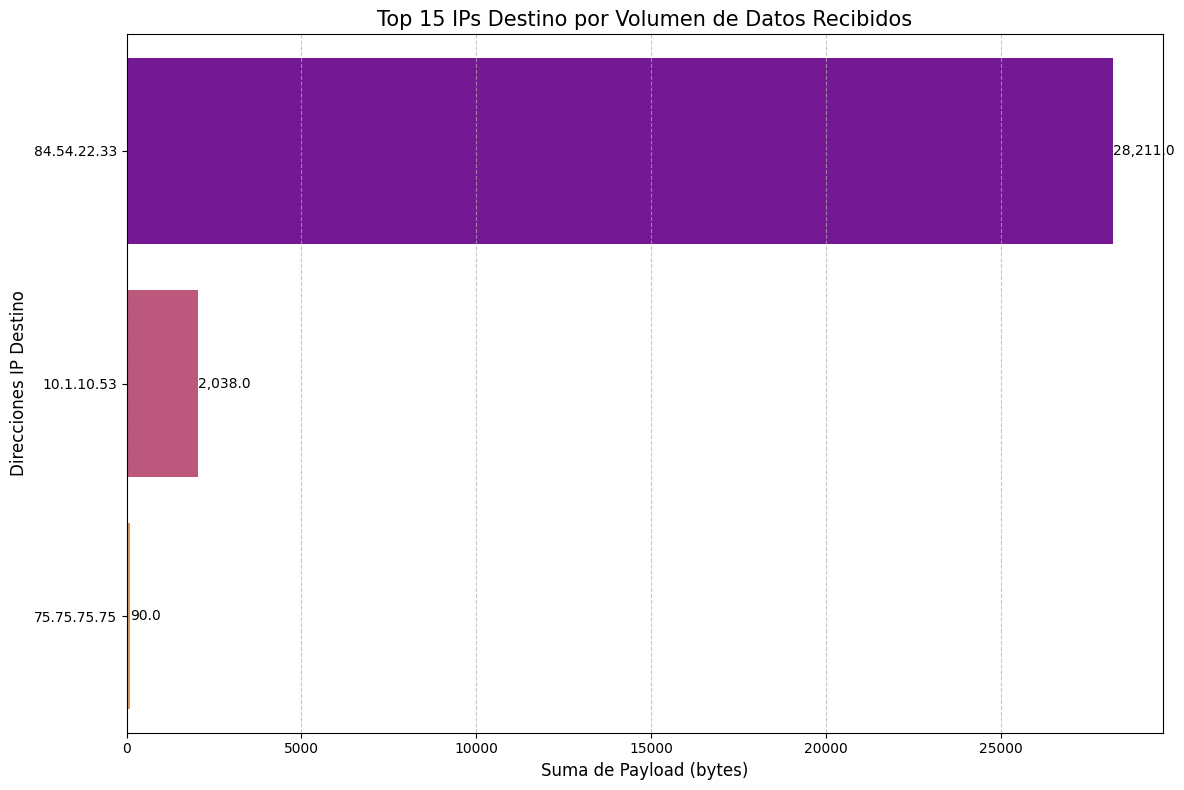

In [41]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_ips_destino.values, y=top_ips_destino.index, orient='h', palette='plasma')
plt.title('Top 15 IPs Destino por Volumen de Datos Recibidos', fontsize=15)
plt.xlabel('Suma de Payload (bytes)', fontsize=12)
plt.ylabel('Direcciones IP Destino', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir etiquetas de valor en las barras
for i, v in enumerate(top_ips_destino.values):
    ax.text(v + 0.1, i, f"{v:,}", va='center')

plt.tight_layout()
plt.savefig('graphs/grafica_ip_destino_payload.png')
plt.show()

### Puertos origen vs. suma de los payloads

In [42]:
# Agrupar por puerto origen y sumar los payloads
df_puertos = df.dropna(subset=['Src_Port'])
df_puertos['Src_Port'] = df_puertos['Src_Port'].astype(int)  # Convertir a entero

puerto_origen_payload = df_puertos.groupby('Src_Port')['Payload'].sum().sort_values(ascending=False)
#Tomar los 15 puertos con mayor volumen para mejor visualización
top_puertos_origen = puerto_origen_payload.head(15)

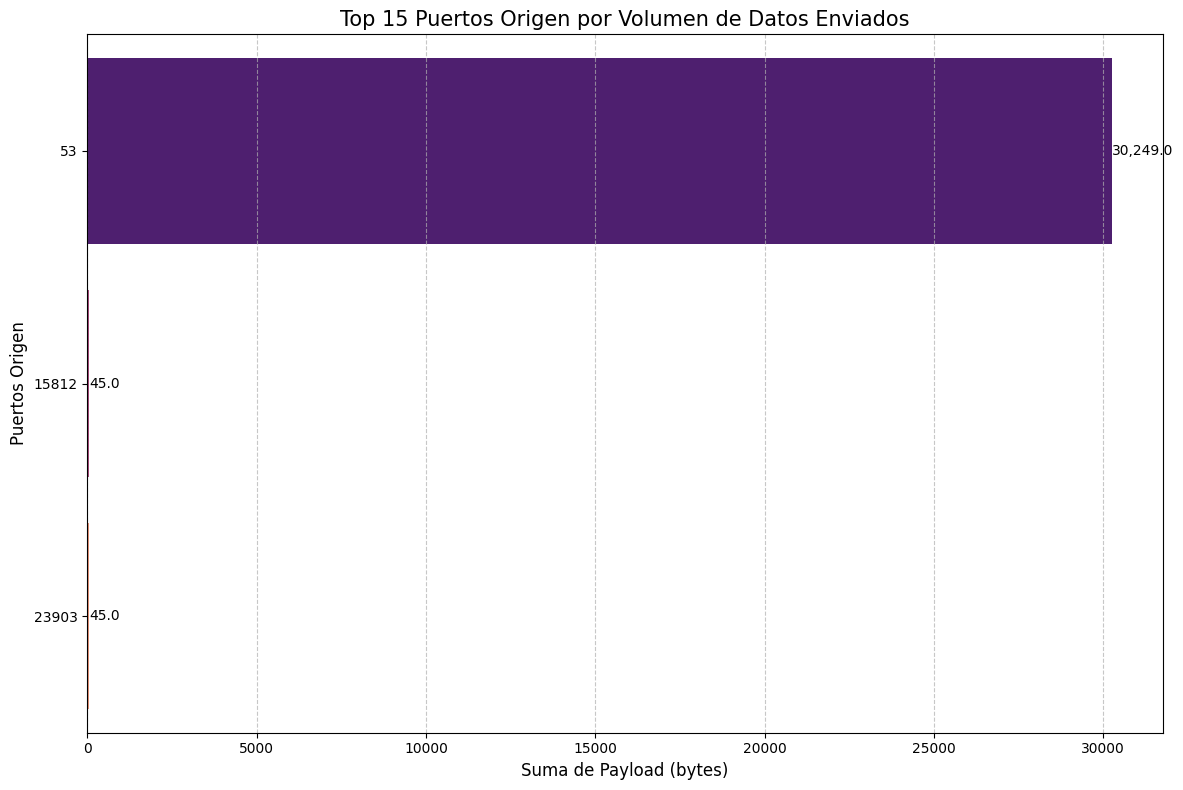

In [43]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_puertos_origen.values, y=top_puertos_origen.index, orient='h', palette='magma')
plt.title('Top 15 Puertos Origen por Volumen de Datos Enviados', fontsize=15)
plt.xlabel('Suma de Payload (bytes)', fontsize=12)
plt.ylabel('Puertos Origen', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir etiquetas de valor en las barras
for i, v in enumerate(top_puertos_origen.values):
    ax.text(v + 0.1, i, f"{v:,}", va='center')

plt.tight_layout()
plt.savefig('graphs/grafica_puerto_origen_payload.png')
plt.show()

### Puertos destino vs. suma de los payloads

In [44]:
#Agrupar por puerto destino y sumar los payloads
df_puertos = df.dropna(subset=['Dst_Port'])
df_puertos['Dst_Port'] = df_puertos['Dst_Port'].astype(int)  # Convertir a entero

puerto_destino_payload = df_puertos.groupby('Dst_Port')['Payload'].sum().sort_values(ascending=False)
#Tomar los 15 puertos con mayor volumen para mejor visualización
top_puertos_destino = puerto_destino_payload.head(15)

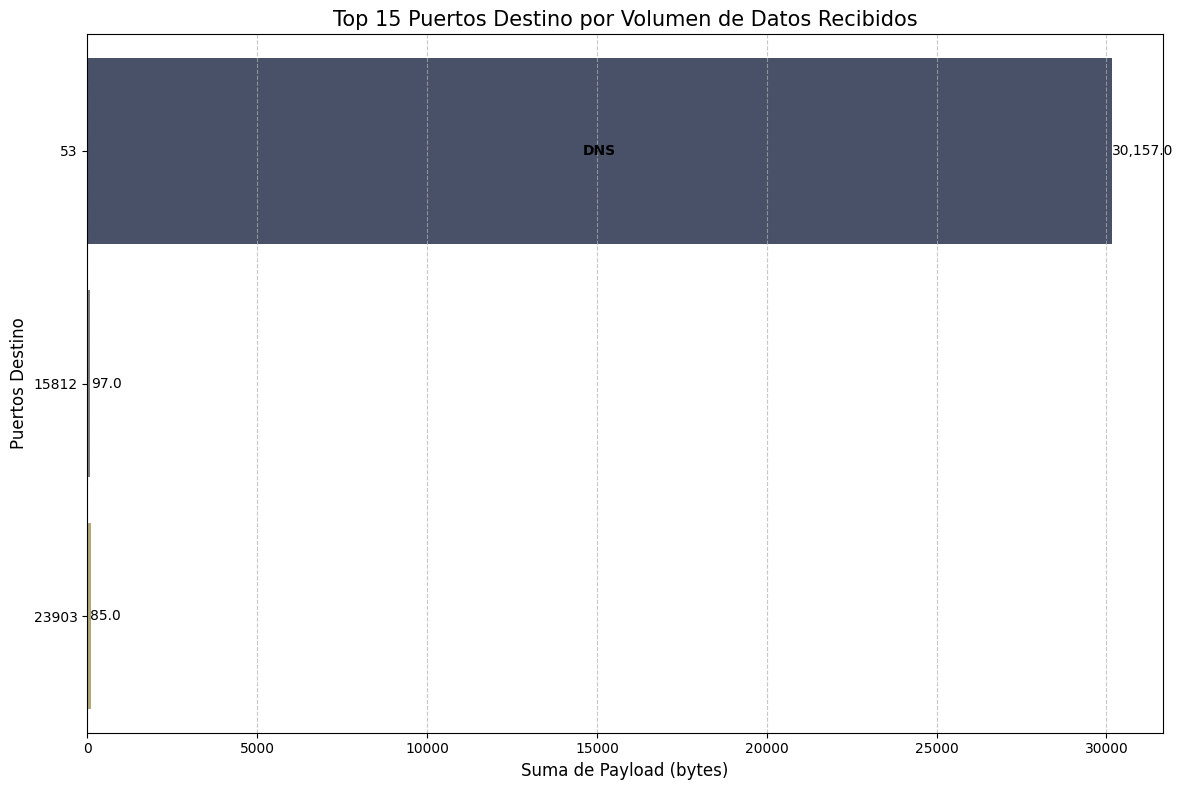

In [45]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_puertos_destino.values, y=top_puertos_destino.index, orient='h', palette='cividis')
plt.title('Top 15 Puertos Destino por Volumen de Datos Recibidos', fontsize=15)
plt.xlabel('Suma de Payload (bytes)', fontsize=12)
plt.ylabel('Puertos Destino', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir etiquetas de valor en las barras y nombres de servicios comunes
service_names = {
    80: 'HTTP',
    443: 'HTTPS',
    53: 'DNS',
    22: 'SSH',
    21: 'FTP',
    25: 'SMTP',
    110: 'POP3',
    143: 'IMAP',
    3389: 'RDP',
    3306: 'MySQL',
    1433: 'SQL Server',
    8080: 'HTTP Alt',
    23: 'Telnet',
    20: 'FTP Data',
    445: 'SMB'
}

for i, v in enumerate(top_puertos_destino.values):
    ax.text(v + 0.1, i, f"{v:,}", va='center')
    
    # Añadir nombre del servicio si está en nuestro diccionario
    puerto = top_puertos_destino.index[i]
    if puerto in service_names:
        ax.text(v/2, i, service_names[puerto], va='center', ha='center', 
                color='black', fontweight='bold')

plt.tight_layout()
plt.savefig('graphs/grafica_puerto_destino_payload.png')
plt.show()

### Suma de los payloads vs. IP origen más frecuente

In [46]:
#Identificar la IP origen más frecuente
ip_mas_frecuente = df['Src_Address'].value_counts().idxmax()
print(f"La IP origen más frecuente es: {ip_mas_frecuente}")

#Filtrar dataframe para esa IP
df_ip_frecuente = df[df['Src_Address'] == ip_mas_frecuente].copy()

#Agrupar por hora para ver la evolución temporal
df_ip_frecuente['Hora'] = df_ip_frecuente['Datetime'].dt.floor('H')
trafico_por_hora = df_ip_frecuente.groupby('Hora')['Payload'].sum()

La IP origen más frecuente es: 10.1.10.53


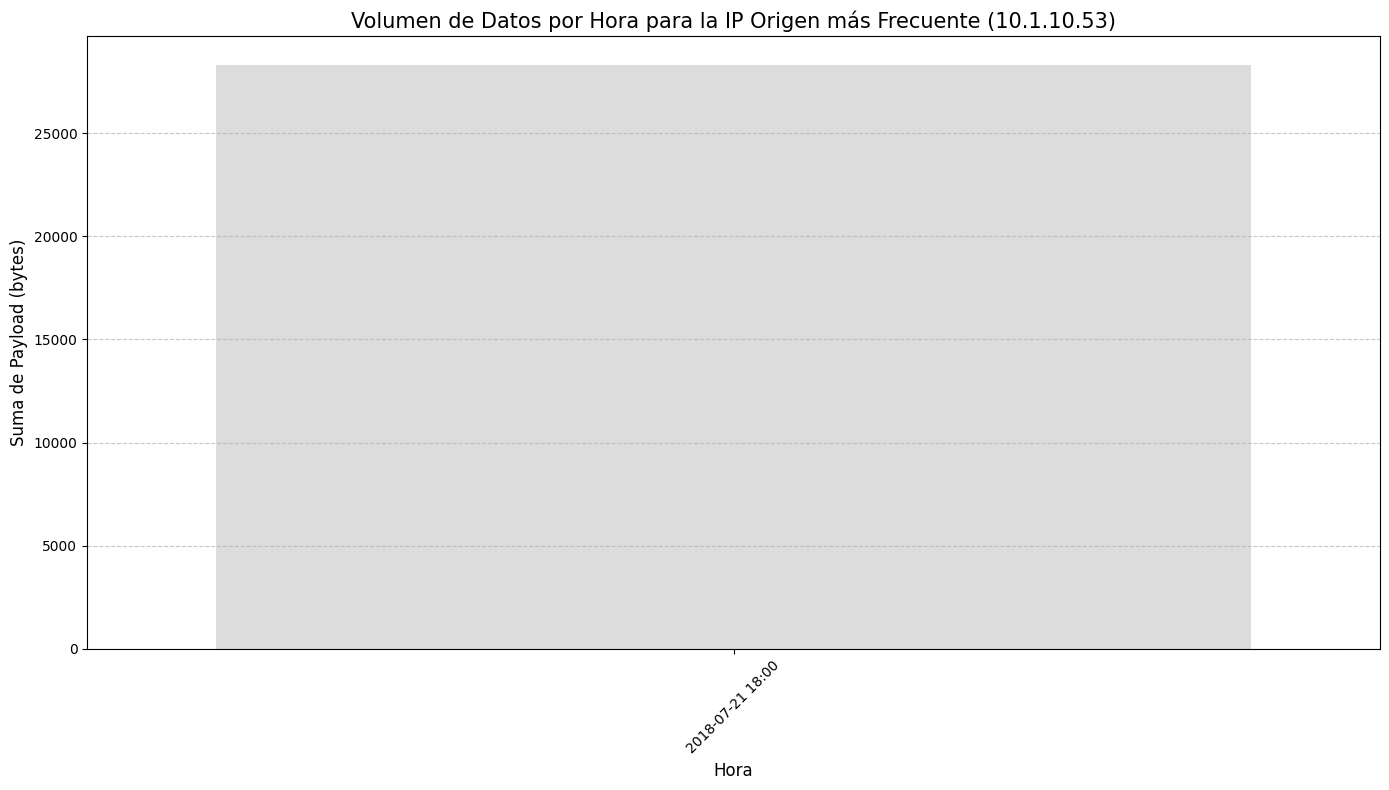

In [47]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=trafico_por_hora.index, y=trafico_por_hora.values, palette='coolwarm')
plt.title(f'Volumen de Datos por Hora para la IP Origen más Frecuente ({ip_mas_frecuente})', fontsize=15)
plt.xlabel('Hora', fontsize=12)
plt.ylabel('Suma de Payload (bytes)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Formatear las etiquetas de hora en el eje X para que sean más legibles
fecha_labels = [hora.strftime('%Y-%m-%d %H:%M') for hora in trafico_por_hora.index]
ax.set_xticklabels(fecha_labels)

plt.tight_layout()
plt.savefig('graphs/grafica_tiempo_ip_frecuente.png')
plt.show()

### ¿Es común el comportamiento?
* Basado en las gráficas analizadas, el comportamiento de tráfico observado no es común en una red normal. 
* La actividad muestra patrones claramente anómalos: una única dirección IP (10.1.10.53) genera casi todo el tráfico, el puerto 53 (DNS) domina el volumen de datos tanto enviados como recibidos, existe una comunicación bidireccional intensa con el servidor 84.54.22.33, y la actividad está concentrada en un único período temporal. 
* Estos patrones sugieren fuertemente un escenario de reconocimiento, tunneling DNS o el establecimiento de un canal de comando y control, representando una probable actividad maliciosa en la red.